In [1]:
import numpy as np
from plotting_utilities import *
from matplotlib import cm
from scipy import stats

### ERAI MCS effective radius and precipitation values

In [2]:
# array of years
years = np.arange( 1983, 2008 )

# create list of file names
file_years = file_concatenator(years)

# Are we only looking at tropical MCSs?
minlat_array = nc_open_compile(file_years,"min latitude")
print(np.nanmin(minlat_array))
maxlat_array = nc_open_compile(file_years,"max latitude")
print(np.nanmax(maxlat_array))
tropical_indx = np.argwhere( (minlat_array >= -30) & (maxlat_array <= 30) )[:,0]
print(tropical_indx.shape)

# applying same for MCS lifetime and morphology
lifetime_array = nc_open_compile(file_years,"lifetime")
lifetime_ERAI = negative_to_nan(lifetime_array)[tropical_indx]
maxrad_array = nc_open_compile(file_years,"maxrad")
maxrad_ERAI = negative_to_nan(maxrad_array)[tropical_indx]
rad_array = nc_open_compile(file_years,"rad")
rad_ERAI = negative_to_nan(rad_array)[tropical_indx]
minctt_array = nc_open_compile(file_years,"minctt")
minctt_ERAI = negative_to_nan(minctt_array)[tropical_indx]

# applying same for pmax and pacc
pmax_array = nc_open_compile(file_years,"pmax")
pmax_ERAI = negative_to_nan(pmax_array)[tropical_indx]
pacc_array = nc_open_compile(file_years,"pacc")
pacc_ERAI = negative_to_nan(pacc_array)[tropical_indx]*3600 # convert to m3 / h

-56.0
56.0
(695667,)


### RCE MCS effective radius and precipitation values

In [3]:
#path = '/groups/sylvia/JAS-MCS-rain/RCE-postprocessed/'
path = '/xdisk/sylvia/RCE-CAPE-exploration/'
ssts = np.arange( 280, 315, 5 )

#mean_285 = xr.open_dataset( path + 'RCE_COL_MEAN_285.nc' )
#mean_290 = xr.open_dataset( path + 'RCE_COL_MEAN_290.nc' )
mean_295 = xr.open_dataset( path + 'CAPE-to-200K/RCE_COL_MEAN_295.nc' )
mean_300 = xr.open_dataset( path + 'RCE_COL_MEAN_300.nc' )
mean_305 = xr.open_dataset( path + 'RCE_COL_MEAN_305.nc' )
mean_310 = xr.open_dataset( path + 'RCE_COL_MEAN_310.nc' )

p99_295 = xr.open_dataset( path + 'CAPE-to-200K/RCE_COL_99_295.nc' )
p99_300 = xr.open_dataset( path + 'RCE_COL_99_300.nc' )
p99_305 = xr.open_dataset( path + 'RCE_COL_99_305.nc' )
p99_310 = xr.open_dataset( path + 'RCE_COL_99_310.nc' )

#clusters_295 = xr.open_dataset( path + 'RCE_COL_cluster-sizes_295.nc' )
clusters_300 = xr.open_dataset( path + 'RCE_COL_cluster-sizes_300.nc' )
clusters_305 = xr.open_dataset( path + 'RCE_COL_cluster-sizes_305.nc' )
clusters_310 = xr.open_dataset( path + 'RCE_COL_cluster-sizes_310.nc' )

precip_RCE = np.concatenate( (mean_300['p_rate'], mean_305['p_rate'], mean_310['p_rate']), axis=0 )
precip99_RCE = np.concatenate( (p99_300['p_rate'], p99_305['p_rate'], p99_310['p_rate']), axis=0 )
clusters = np.concatenate( (clusters_300['cluster_sizes'], clusters_305['cluster_sizes'], clusters_310['cluster_sizes']),
                          axis=0 )
reff_RCE = 2*( clusters * 9 / np.pi )**0.5

In [16]:
i = np.argwhere( ~np.isnan(precip99_RCE) )
x = reff_RCE[i][:,0]
y = precip99_RCE[i][:,0]
slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
print(slope)

i = np.argwhere( ~np.isnan(pacc_ERAI) & ~np.isnan(rad_ERAI) )
x = rad_ERAI[i][:,0]
y = pacc_ERAI[i][:,0]
slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
print(slope)

0.08933835909868666
1440102131.6195726


In [5]:
def scatter_hist(x, y, xbins, ybins, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    wgts = np.ones_like(x)/float(len(x))*100
    h = ax.hist2d( x, y, bins=(xbins, ybins), weights=wgts, cmap=cm.Blues )
    ax_histx.hist(x, bins=xbins, edgecolor='k', weights=wgts )
    ax_histx.tick_params(axis='both', which='major', labelsize=12)
    wgts = np.ones_like(y)/float(len(y))*100
    ax_histy.hist(y, bins=ybins, edgecolor='k', weights=wgts, orientation='horizontal')
    ax_histy.tick_params(axis='both', which='major', labelsize=12)
    ax_histy.set_yscale('log')
    return h

(695667,) (695667,)
0.02290146449073453
0.08933835909868666


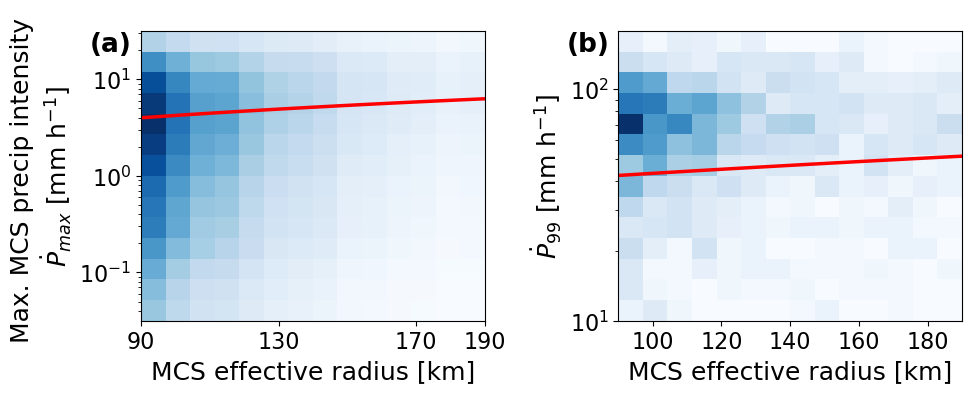

In [41]:
fig = plt.figure( figsize=(10, 4) )
font_size = 16
plt.rcParams.update({
    'font.size':font_size,
    'axes.labelsize':font_size+2,
    'xtick.labelsize':font_size,
    'ytick.labelsize':font_size,
    'legend.fontsize':font_size,
})
i = np.where( (~np.isnan(rad_ERAI)) & (~np.isnan(pmax_ERAI)) )

gs = fig.add_gridspec( 1, 2 )
ax = fig.add_subplot(gs[0,0])
nbin = 15
xbins = np.linspace( 90, 190, nbin )
ybins = np.logspace( -1.5, 1.5, nbin )
x = rad_ERAI[i]
wgts = np.ones_like(x)/float(len(x))*100
print(x.shape,wgts.shape)
h = ax.hist2d( x, pmax_ERAI[i], bins=(xbins, ybins), weights=wgts, cmap=cm.Blues )
slope, intercept, r_value, p_value, std_err = stats.linregress( rad_ERAI[i], pmax_ERAI[i] )
print(slope)
ax.plot( xbins, slope*xbins+intercept, color='red', lw=2.5 )
ax.set_yscale( 'log' )
ax.set_xticks( [90, 130, 170, 190] )
ax.set_ylabel( r'Max. MCS precip intensity '
              '\n'
              '$\dot{P}_{max}$ [mm h$^{-1}$]' )
ax.set_xlabel( 'MCS effective radius [km]' )
ax.text( -0.15, 0.93, '(a)', weight='bold', fontsize=font_size+3, transform=ax.transAxes )

ax2 = fig.add_subplot(gs[0,1])
i = np.argwhere( ~np.isnan(precip99_RCE) )
x = reff_RCE[i][:,0]
y = precip99_RCE[i][:,0]
wgts = np.ones_like(x)/float(len(x))*100
h = ax2.hist2d( x, y, cmap=cm.Blues, weights=wgts, bins=(xbins, np.logspace(1,2.25,nbin)) )
slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
print(slope)
ax2.plot( xbins, slope*xbins+intercept, color='red', lw=2.5 )
ax2.set_xlabel( 'MCS effective radius [km]' )
ax2.set_ylabel( r'$\dot{P}_{99}$ [mm h$^{-1}$]' )
ax2.text( -0.15, 0.93, '(b)', weight='bold', fontsize=font_size+3, transform=ax2.transAxes )
ax2.set_yscale( 'log' )

plt.tight_layout()
#fig.savefig( '/groups/sylvia/JAS-MCS-rain/figures/rad-precip-ERAI.pdf', bbox_inches='tight' )
plt.show()